# Initialize

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pennylane as qml
from pennylane import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [2]:
import sys
import importlib

# Add the parent directory to sys.path
sys.path.append("..")

# Import and reload the module
import Scripts.data_process_utils as dpu
importlib.reload(dpu)

<module 'Scripts.data_process_utils' from "/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Notebook_Models/Pennylane_Models/Don't Touch/Model_Final_Pennylane_Keras_QNN_11_Features_6M_DS/Scripts/data_process_utils.py">

In [3]:
import Scripts.evaluation_functions as eval
import importlib
importlib.reload(eval)

<module 'Scripts.evaluation_functions' from "/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Notebook_Models/Pennylane_Models/Don't Touch/Model_Final_Pennylane_Keras_QNN_11_Features_6M_DS/Scripts/evaluation_functions.py">

# Data Loading

In [5]:
finance_df=pd.read_csv("../../../.././Datasets/PS_20174392719_1491204439457_log.csv",delimiter=',')
finance_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df=finance_df

num_samples = int(len(df) * 0.30)

df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))

df_sampled = df_sampled.sample(n=num_samples, random_state=42).reset_index(drop=True)

df_sampled

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_50699/2776949306.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,402,PAYMENT,2293.60,C357857862,82351.00,80057.40,M1737315637,0.00,0.00,0,0
1,226,CASH_OUT,112620.18,C1690757109,128.00,0.00,C1858194355,0.00,112620.18,0,0
2,202,TRANSFER,41450.02,C186607867,7761.00,0.00,C996190755,0.00,41450.02,0,0
3,300,CASH_OUT,88887.47,C997373544,283.00,0.00,C247732967,2395169.12,2484056.59,0,0
4,235,TRANSFER,1059586.98,C1898581284,2010.00,0.00,C418902856,2456601.85,3516188.82,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1908781,400,CASH_IN,199255.80,C1443439100,92106.00,291361.80,C63022763,0.00,0.00,0,0
1908782,355,CASH_OUT,344019.25,C736748207,0.00,0.00,C1239114523,998029.93,1342049.18,0,0
1908783,276,CASH_IN,145108.10,C2144495050,11321.00,156429.10,C1494206372,278152.44,133044.34,0,0
1908784,37,CASH_OUT,189165.99,C251177355,0.00,0.00,C1815144574,817453.72,1006619.71,0,0


### Cleaning

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

finance_df = df_sampled

df_cleaned = finance_df.loc[(finance_df['type'].isin(['CASH_OUT', 'TRANSFER'])),:]
df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})

df_smote_balanced = dpu.balance_with_smote(df_cleaned, target_col='isFraud', smote_ratio=0.1, random_state=42)
fraud_count_smote, fraud_percentage_smote = dpu.count_fraud_percentage(df_smote_balanced)
print(f"After SMOTE - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")

final_df=df_smote_balanced

final_df = final_df.sort_values(by='step').astype(float)

df=final_df

y = df['isFraud']
X = df.drop(columns=['isFraud'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit only on training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # ✅ Fit only on train
X_test = scaler.transform(X_test)  # ✅ Use same scaler but don't fit again

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_50699/2877776214.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_50699/2877776214.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})


After SMOTE - Fraudulent: 82810, Fraud Percentage: 9.09%


In [8]:
X_train.shape

(728735, 7)

In [9]:
y_train.value_counts()

isFraud
0.0    662349
1.0     66386
Name: count, dtype: int64

Defining a QNode
================



In [10]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer(weights, n_qubits):
    index = 0  # Initialize index to track unique weights

    # Apply first set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply first set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply second set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply second set of CNOT gates
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply RY gates on qubit 3
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index

    # Apply nested RY gates for two layers
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1  # Increment index

    # Apply third set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply final set of RZ gates
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1  # Increment index

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs


In [11]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer_long(weights, n_qubits):
    index = 0  # Start index for weights

    # First block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # First set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Second block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # Second set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Third block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Nested loop of RY
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1

    # Third set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # First block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Fourth set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Fourth block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Second block of RZ
    for i in range(n_qubits):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Third block of RY
    for i in range(n_qubits):
        qml.RY(weights[index], wires=i)
        index += 1

    # Fifth set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Final block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    return index  # Total number of indices used

@qml.qnode(dev)
def qnode_long(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs

In [12]:
@qml.qnode(dev)
def qnode_long_solo(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    for w in weights:
        custom_layer_long(w,n_qubits)
    outputs = [qml.expval(qml.PauliZ(wires=0)),qml.expval(qml.PauliZ(wires=1))]
    return outputs

# Quantum Circuit



In [13]:
import pennylane as qml
import matplotlib.pyplot as plt

In [14]:
n_layers = 1
n_qubits=3
total_weights = 3 * (n_qubits + 1) + 2 * n_qubits + 2

weight_shapes = {"weights": (n_layers, total_weights+1)}

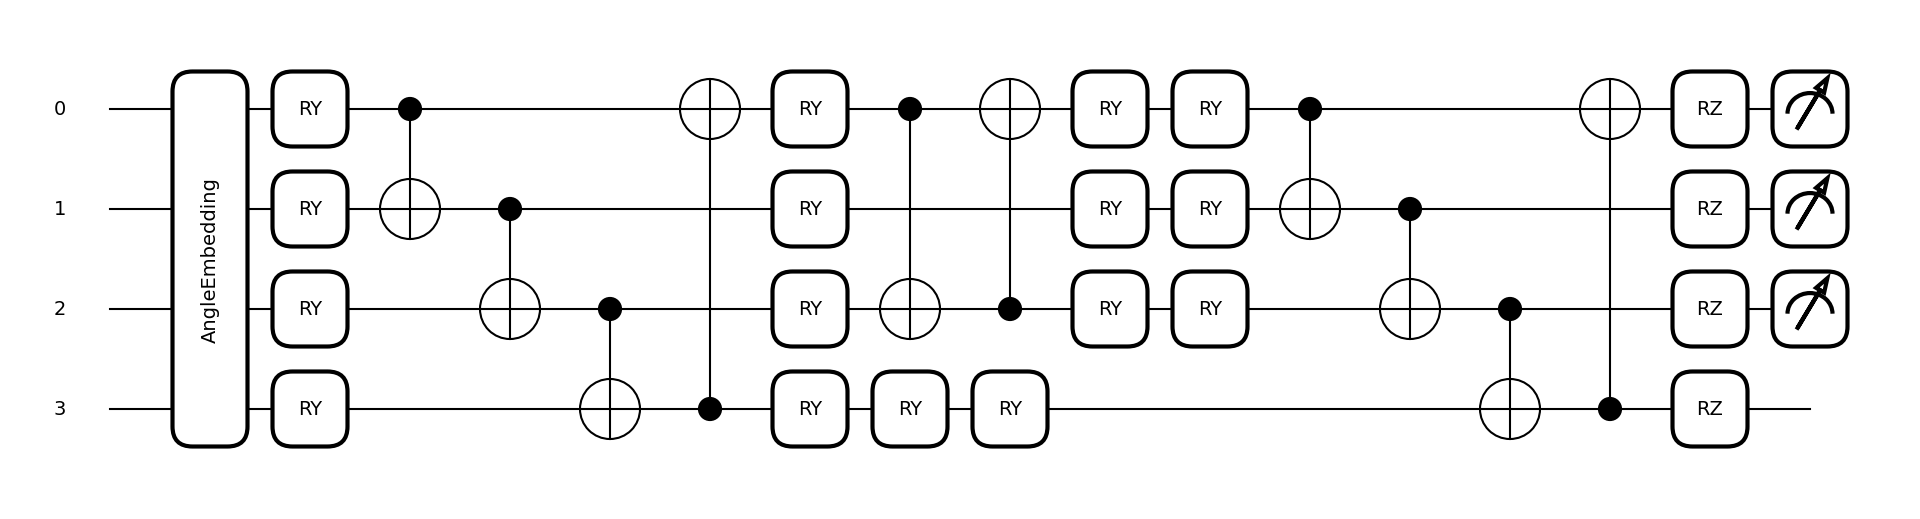

In [15]:
weights = np.random.random(size=(n_layers, total_weights))
fig, ax = qml.draw_mpl(qnode)(X_train[:, :4], weights)
plt.show()

In [16]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


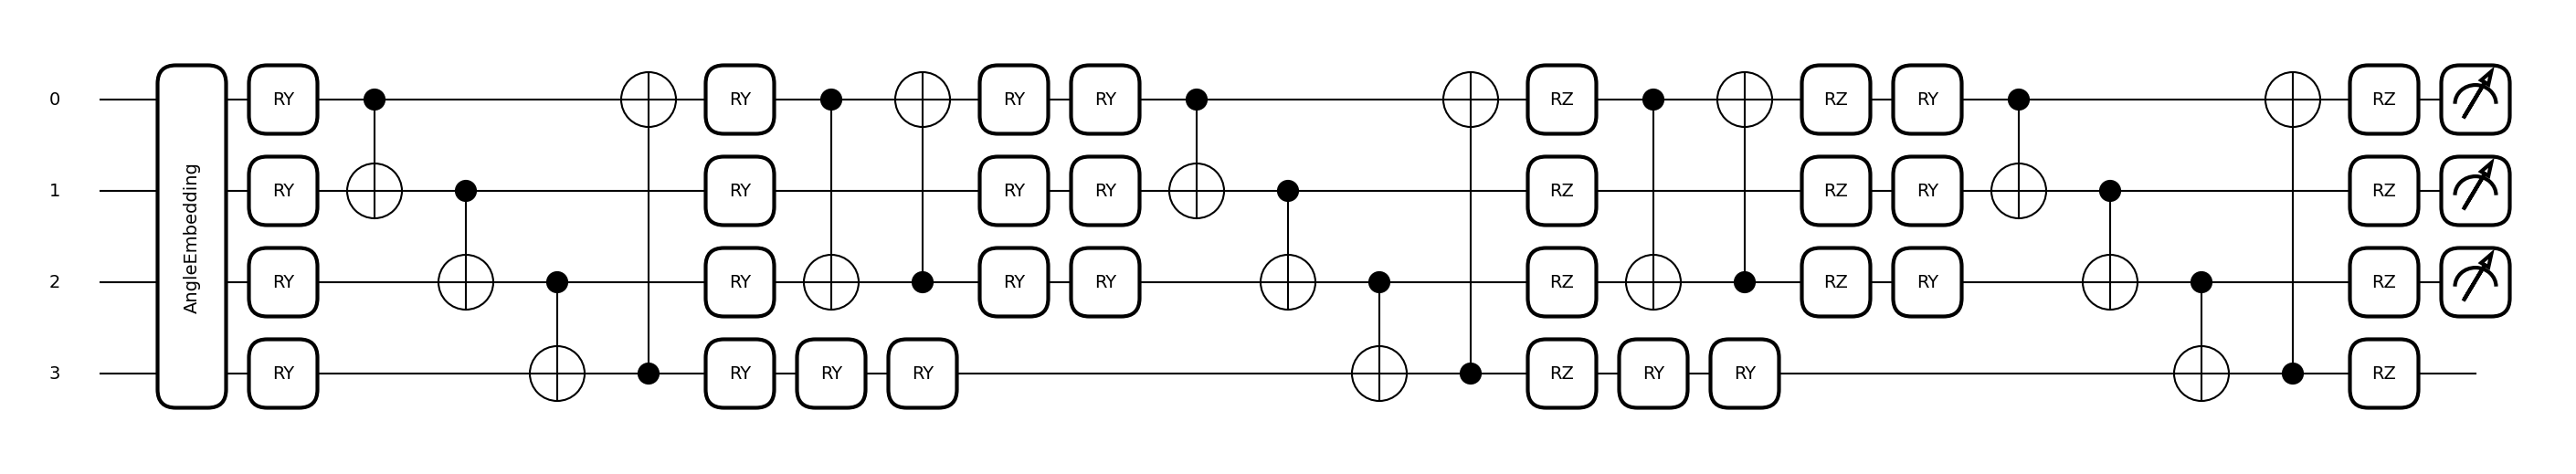

In [18]:
weights = np.random.random(size=(n_layers, total_weights_long))
fig, ax = qml.draw_mpl(qnode_long)(X.iloc[:, :4], weights)

plt.show()

In [19]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

Metal device set to: Apple M2 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2025-02-09 18:12:06.184199: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-09 18:12:06.184220: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

# Checking The Influence of Quantum Model

For this to be implemented we lowered the amount of data used to have a faster run of the quantum circuit

In [37]:
from sklearn.metrics import classification_report

In [38]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


In [39]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

In [42]:
import os

# Ensure the directory exists
save_dir = "Final_Experiment_Vol_2"
os.makedirs(save_dir, exist_ok=True)

# Run multiple training iterations and save the models
for i in range(10):
    print(f"Iteration {i+1}")

    # Classic model
    classic_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        Dense(2, activation=tf.nn.softmax)
    ])
    classic_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    with tf.device('/CPU:0'):
        classic_model.fit(X_train, y_train, validation_split=0.2, batch_size=256, epochs=5, shuffle=True, verbose=1)
    
    eval.evaluate_model(classic_model, X_test, y_test)
    
    # Save only model weights
    classic_model.save_weights(os.path.join(save_dir, f"classic_model_iteration_experiment_2{i+1}.h5"))

    print("Evaluating Quantum Model")
    print("=" * 140)
    
    # Quantum model
    quantum_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        qlayer,
        Dense(2, activation=tf.nn.softmax)
    ])
    quantum_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    with tf.device('/CPU:0'):
        quantum_model.fit(X_train, y_train, validation_split=0.2, batch_size=256, epochs=5, shuffle=True, verbose=1)
    
    eval.evaluate_model(quantum_model, X_test, y_test)
    
    # Save only model weights
    quantum_model.save_weights(os.path.join(save_dir, f"quantum_model_iteration_experiment_2{i+1}.h5"))

    print("=" * 140)


Iteration 1
Epoch 1/5
  42/1708 [..............................] - ETA: 4s - loss: 0.4471 - accuracy: 0.8812

2025-01-29 20:54:19.395036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1707/1708 [============================>.] - ETA: 0s - loss: 0.1109 - accuracy: 0.9647

2025-01-29 20:54:23.763399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1109 - accuracy: 0.9647 - val_loss: 0.0749 - val_accuracy: 0.9742
Epoch 2/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0702 - accuracy: 0.9762 - val_loss: 0.0656 - val_accuracy: 0.9774
Epoch 3/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0568 - accuracy: 0.9805 - val_loss: 0.0536 - val_accuracy: 0.9816
Epoch 4/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9827 - val_loss: 0.0494 - val_accuracy: 0.9839
Epoch 5/5
 128/1424 [=>............................] - ETA: 1s

2025-01-29 20:54:44.166097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165352    570]
 [  1885  14377]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.88      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.94      0.96    182184
weighted avg       0.99      0.99      0.99    182184


Accuracy: 0.9865246124796908
Recall: 0.884085598327389
F1 Score: 0.9213367938735622
Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 2:08 - loss: 1.3165 - accuracy: 0.0898

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 148s 87ms/step - loss: 0.1195 - accuracy: 0.9583 - val_loss: 0.0733 - val_accuracy: 0.9772
Epoch 2/5
1708/1708 [==============================] - 146s 85ms/step - loss: 0.0633 - accuracy: 0.9796 - val_loss: 0.0554 - val_accuracy: 0.9816
Epoch 3/5
1708/1708 [==============================] - 145s 85ms/step - loss: 0.0537 - accuracy: 0.9817 - val_loss: 0.0482 - val_accuracy: 0.9836
Epoch 4/5
1708/1708 [==============================] - 146s 85ms/step - loss: 0.0450 - accuracy: 0.9841 - val_loss: 0.0437 - val_accuracy: 0.9859
Epoch 5/5
1424/1424 [==============================] - 35s 25ms/step
Confusion Matrix:
[[165449    473]
 [  1668  14594]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.97      0.90      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.95      0.96    182184
weighted

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


  46/1708 [..............................] - ETA: 3s - loss: 0.4563 - accuracy: 0.8629

2025-01-29 21:07:23.235673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1707/1708 [============================>.] - ETA: 0s - loss: 0.1054 - accuracy: 0.9650

2025-01-29 21:07:27.504643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1054 - accuracy: 0.9649 - val_loss: 0.0777 - val_accuracy: 0.9737
Epoch 2/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0719 - accuracy: 0.9738 - val_loss: 0.0738 - val_accuracy: 0.9746
Epoch 3/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9763 - val_loss: 0.0696 - val_accuracy: 0.9790
Epoch 4/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9788 - val_loss: 0.0691 - val_accuracy: 0.9767
Epoch 5/5
 150/1424 [==>...........................] - ETA: 1s

2025-01-29 21:07:49.087781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 970us/step
Confusion Matrix:
[[165217    705]
 [  2688  13574]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    165922
         1.0       0.95      0.83      0.89     16262

    accuracy                           0.98    182184
   macro avg       0.97      0.92      0.94    182184
weighted avg       0.98      0.98      0.98    182184


Accuracy: 0.9813759715452509
Recall: 0.8347066781453696
F1 Score: 0.8889034412756622
Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:54 - loss: 0.7655 - accuracy: 0.1543

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 131s 76ms/step - loss: 0.1154 - accuracy: 0.9636 - val_loss: 0.0767 - val_accuracy: 0.9747
Epoch 2/5
1708/1708 [==============================] - 135s 79ms/step - loss: 0.0593 - accuracy: 0.9794 - val_loss: 0.0570 - val_accuracy: 0.9805
Epoch 3/5
1708/1708 [==============================] - 135s 79ms/step - loss: 0.0540 - accuracy: 0.9815 - val_loss: 0.0499 - val_accuracy: 0.9815
Epoch 4/5
1708/1708 [==============================] - 127s 74ms/step - loss: 0.0518 - accuracy: 0.9816 - val_loss: 0.0572 - val_accuracy: 0.9813
Epoch 5/5
1424/1424 [==============================] - 32s 23ms/step
Confusion Matrix:
[[164084   1838]
 [  1352  14910]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    165922
         1.0       0.89      0.92      0.90     16262

    accuracy                           0.98    182184
   macro avg       0.94      0.95      0.95    182184
weighted

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-29 21:19:20.615210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1704/1708 [============================>.] - ETA: 0s - loss: 0.1029 - accuracy: 0.9645

2025-01-29 21:19:24.169759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 4s 2ms/step - loss: 0.1028 - accuracy: 0.9645 - val_loss: 0.0645 - val_accuracy: 0.9797
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9818 - val_loss: 0.0538 - val_accuracy: 0.9821
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0473 - accuracy: 0.9842 - val_loss: 0.0511 - val_accuracy: 0.9820
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9853 - val_loss: 0.0454 - val_accuracy: 0.9869
Epoch 5/5
 143/1424 [==>...........................] - ETA: 1s

2025-01-29 21:19:41.114632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165250    672]
 [  1878  14384]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.88      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.94      0.96    182184
weighted avg       0.99      0.99      0.99    182184


Accuracy: 0.9860031616387828
Recall: 0.8845160496863854
F1 Score: 0.9185771760648828
Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 2:00 - loss: 1.1525 - accuracy: 0.0996

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 127s 74ms/step - loss: 0.1201 - accuracy: 0.9573 - val_loss: 0.0650 - val_accuracy: 0.9796
Epoch 2/5
1708/1708 [==============================] - 127s 74ms/step - loss: 0.0558 - accuracy: 0.9812 - val_loss: 0.0577 - val_accuracy: 0.9826
Epoch 3/5
1708/1708 [==============================] - 126s 74ms/step - loss: 0.0467 - accuracy: 0.9845 - val_loss: 0.0513 - val_accuracy: 0.9832
Epoch 4/5
1708/1708 [==============================] - 126s 74ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0476 - val_accuracy: 0.9887
Epoch 5/5
1424/1424 [==============================] - 31s 22ms/step
Confusion Matrix:
[[165601    321]
 [  2214  14048]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.98      0.86      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.93      0.95    182184
weighted

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-29 21:30:49.501350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1685/1708 [============================>.] - ETA: 0s - loss: 0.1064 - accuracy: 0.9665

2025-01-29 21:30:53.286576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1057 - accuracy: 0.9667 - val_loss: 0.0541 - val_accuracy: 0.9824
Epoch 2/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0457 - accuracy: 0.9839 - val_loss: 0.0433 - val_accuracy: 0.9841
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0376 - accuracy: 0.9861 - val_loss: 0.0350 - val_accuracy: 0.9872
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9875 - val_loss: 0.0355 - val_accuracy: 0.9855
Epoch 5/5
 151/1424 [==>...........................] - ETA: 1s

2025-01-29 21:31:10.640940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 989us/step
Confusion Matrix:
[[165302    620]
 [  1244  15018]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.92      0.94     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.96      0.97    182184
weighted avg       0.99      0.99      0.99    182184


Accuracy: 0.9897685856057612
Recall: 0.9235026442012053
F1 Score: 0.9415673981191223
Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:51 - loss: 0.6068 - accuracy: 0.7910

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 125s 73ms/step - loss: 0.1011 - accuracy: 0.9668 - val_loss: 0.0608 - val_accuracy: 0.9786
Epoch 2/5
1708/1708 [==============================] - 125s 73ms/step - loss: 0.0483 - accuracy: 0.9830 - val_loss: 0.0450 - val_accuracy: 0.9836
Epoch 3/5
1708/1708 [==============================] - 124s 73ms/step - loss: 0.0440 - accuracy: 0.9849 - val_loss: 0.0377 - val_accuracy: 0.9864
Epoch 4/5
1708/1708 [==============================] - 126s 73ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 5/5
1424/1424 [==============================] - 33s 23ms/step
Confusion Matrix:
[[165594    328]
 [  2042  14220]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.98      0.87      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.94      0.96    182184
weighted

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-29 21:42:18.320364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1686/1708 [============================>.] - ETA: 0s - loss: 0.0827 - accuracy: 0.9734

2025-01-29 21:42:21.998270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 4s 2ms/step - loss: 0.0824 - accuracy: 0.9735 - val_loss: 0.0507 - val_accuracy: 0.9830
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9839 - val_loss: 0.0497 - val_accuracy: 0.9855
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0410 - accuracy: 0.9858 - val_loss: 0.0446 - val_accuracy: 0.9851
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0374 - accuracy: 0.9871 - val_loss: 0.0381 - val_accuracy: 0.9879
Epoch 5/5
 153/1424 [==>...........................] - ETA: 1s

2025-01-29 21:42:39.303036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 993us/step
Confusion Matrix:
[[164601   1321]
 [   809  15453]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165922
         1.0       0.92      0.95      0.94     16262

    accuracy                           0.99    182184
   macro avg       0.96      0.97      0.96    182184
weighted avg       0.99      0.99      0.99    182184


Accuracy: 0.9883085232512185
Recall: 0.9502521215102694
F1 Score: 0.9355248819469669
Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 2:00 - loss: 1.1292 - accuracy: 0.1211

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 131s 77ms/step - loss: 0.1250 - accuracy: 0.9577 - val_loss: 0.0698 - val_accuracy: 0.9776
Epoch 2/5
1708/1708 [==============================] - 136s 79ms/step - loss: 0.0637 - accuracy: 0.9789 - val_loss: 0.0547 - val_accuracy: 0.9822
Epoch 3/5
1708/1708 [==============================] - 134s 78ms/step - loss: 0.0525 - accuracy: 0.9822 - val_loss: 0.0505 - val_accuracy: 0.9835
Epoch 4/5
1708/1708 [==============================] - 136s 79ms/step - loss: 0.0454 - accuracy: 0.9842 - val_loss: 0.0419 - val_accuracy: 0.9857
Epoch 5/5
1424/1424 [==============================] - 34s 24ms/step
Confusion Matrix:
[[165359    563]
 [  1865  14397]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.89      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.94      0.96    182184
weighted

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-29 21:54:25.614563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1696/1708 [============================>.] - ETA: 0s - loss: 0.1044 - accuracy: 0.9640

2025-01-29 21:54:29.585433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1041 - accuracy: 0.9641 - val_loss: 0.0637 - val_accuracy: 0.9799
Epoch 2/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9823 - val_loss: 0.0502 - val_accuracy: 0.9850
Epoch 3/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0465 - accuracy: 0.9845 - val_loss: 0.0615 - val_accuracy: 0.9768
Epoch 4/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0447 - accuracy: 0.9853 - val_loss: 0.0473 - val_accuracy: 0.9861
Epoch 5/5
 130/1424 [=>............................] - ETA: 1s

2025-01-29 21:54:48.917047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165124    798]
 [  1597  14665]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.95      0.90      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.95      0.96    182184
weighted avg       0.99      0.99      0.99    182184


Accuracy: 0.986853949852896
Recall: 0.901795597097528
F1 Score: 0.9245074862096139
Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 2:04 - loss: 0.3713 - accuracy: 0.8887

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 136s 80ms/step - loss: 0.0919 - accuracy: 0.9715 - val_loss: 0.0617 - val_accuracy: 0.9801
Epoch 2/5
1708/1708 [==============================] - 130s 76ms/step - loss: 0.0468 - accuracy: 0.9833 - val_loss: 0.0474 - val_accuracy: 0.9807
Epoch 3/5
1708/1708 [==============================] - 133s 78ms/step - loss: 0.0409 - accuracy: 0.9855 - val_loss: 0.0370 - val_accuracy: 0.9875
Epoch 4/5
1708/1708 [==============================] - 131s 77ms/step - loss: 0.0366 - accuracy: 0.9869 - val_loss: 0.0422 - val_accuracy: 0.9861
Epoch 5/5
1424/1424 [==============================] - 33s 23ms/step
Confusion Matrix:
[[165279    643]
 [  1401  14861]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.91      0.94     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.95      0.96    182184
weighted

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-29 22:06:31.724449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1690/1708 [============================>.] - ETA: 0s - loss: 0.0980 - accuracy: 0.9679

2025-01-29 22:06:35.505287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 4s 3ms/step - loss: 0.0977 - accuracy: 0.9680 - val_loss: 0.0619 - val_accuracy: 0.9796
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9816 - val_loss: 0.0489 - val_accuracy: 0.9837
Epoch 3/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0460 - accuracy: 0.9839 - val_loss: 0.0449 - val_accuracy: 0.9843
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0424 - accuracy: 0.9852 - val_loss: 0.0413 - val_accuracy: 0.9862
Epoch 5/5
 149/1424 [==>...........................] - ETA: 1s

2025-01-29 22:06:53.492378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165075    847]
 [  1499  14763]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    165922
         1.0       0.95      0.91      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.95      0.96    182184
weighted avg       0.99      0.99      0.99    182184


Accuracy: 0.9871229087076802
Recall: 0.9078219161234781
F1 Score: 0.9263930722891566
Evaluating Quantum Model
Epoch 1/5
   1/1708 [..............................] - ETA: 2:41 - loss: 0.5490 - accuracy: 0.9219

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 124s 73ms/step - loss: 0.1082 - accuracy: 0.9655 - val_loss: 0.0664 - val_accuracy: 0.9786
Epoch 2/5
1708/1708 [==============================] - 121s 71ms/step - loss: 0.0621 - accuracy: 0.9803 - val_loss: 0.0635 - val_accuracy: 0.9805
Epoch 3/5
1708/1708 [==============================] - 121s 71ms/step - loss: 0.0529 - accuracy: 0.9826 - val_loss: 0.0429 - val_accuracy: 0.9840
Epoch 4/5
1708/1708 [==============================] - 123s 72ms/step - loss: 0.0423 - accuracy: 0.9851 - val_loss: 0.0485 - val_accuracy: 0.9848
Epoch 5/5
1424/1424 [==============================] - 31s 22ms/step
Confusion Matrix:
[[165382    540]
 [  2444  13818]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.85      0.90     16262

    accuracy                           0.98    182184
   macro avg       0.97      0.92      0.95    182184
weighted

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-29 22:17:37.954825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1706/1708 [============================>.] - ETA: 0s - loss: 0.0918 - accuracy: 0.9680

2025-01-29 22:17:41.479107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 4s 2ms/step - loss: 0.0917 - accuracy: 0.9680 - val_loss: 0.0508 - val_accuracy: 0.9825
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0442 - accuracy: 0.9842 - val_loss: 0.0446 - val_accuracy: 0.9812
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9865 - val_loss: 0.0359 - val_accuracy: 0.9872
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0318 - accuracy: 0.9882 - val_loss: 0.0319 - val_accuracy: 0.9876
Epoch 5/5
 154/1424 [==>...........................] - ETA: 1s

2025-01-29 22:17:57.786081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 957us/step
Confusion Matrix:
[[165722    200]
 [  2019  14243]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.99      0.88      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.99      0.94      0.96    182184
weighted avg       0.99      0.99      0.99    182184


Accuracy: 0.987820006147631
Recall: 0.8758455294551716
F1 Score: 0.9277316397980785
Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:55 - loss: 0.5019 - accuracy: 0.9199

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 122s 72ms/step - loss: 0.0959 - accuracy: 0.9679 - val_loss: 0.0662 - val_accuracy: 0.9743
Epoch 2/5
1708/1708 [==============================] - 121s 71ms/step - loss: 0.0507 - accuracy: 0.9821 - val_loss: 0.0488 - val_accuracy: 0.9850
Epoch 3/5
1708/1708 [==============================] - 120s 70ms/step - loss: 0.0437 - accuracy: 0.9845 - val_loss: 0.0429 - val_accuracy: 0.9858
Epoch 4/5
1708/1708 [==============================] - 120s 70ms/step - loss: 0.0415 - accuracy: 0.9853 - val_loss: 0.0399 - val_accuracy: 0.9860
Epoch 5/5
1424/1424 [==============================] - 34s 24ms/step
Confusion Matrix:
[[165100    822]
 [  1210  15052]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.95      0.93      0.94     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.96      0.97    182184
weighted

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-29 22:28:44.070227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1691/1708 [============================>.] - ETA: 0s - loss: 0.1054 - accuracy: 0.9643

2025-01-29 22:28:47.949487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1050 - accuracy: 0.9644 - val_loss: 0.0637 - val_accuracy: 0.9790
Epoch 2/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0535 - accuracy: 0.9820 - val_loss: 0.0502 - val_accuracy: 0.9830
Epoch 3/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0467 - accuracy: 0.9843 - val_loss: 0.0466 - val_accuracy: 0.9855
Epoch 4/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0437 - accuracy: 0.9854 - val_loss: 0.0466 - val_accuracy: 0.9852
Epoch 5/5
 142/1424 [=>............................] - ETA: 1s

2025-01-29 22:29:06.299366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165096    826]
 [  1224  15038]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.95      0.92      0.94     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.96      0.97    182184
weighted avg       0.99      0.99      0.99    182184


Accuracy: 0.9887476397488254
Recall: 0.9247325052269093
F1 Score: 0.9361887567702173
Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:56 - loss: 0.6911 - accuracy: 0.4297

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 136s 80ms/step - loss: 0.0964 - accuracy: 0.9681 - val_loss: 0.0546 - val_accuracy: 0.9807
Epoch 2/5
1708/1708 [==============================] - 131s 77ms/step - loss: 0.0493 - accuracy: 0.9831 - val_loss: 0.0452 - val_accuracy: 0.9846
Epoch 3/5
1708/1708 [==============================] - 128s 75ms/step - loss: 0.0406 - accuracy: 0.9860 - val_loss: 0.0415 - val_accuracy: 0.9888
Epoch 4/5
1708/1708 [==============================] - 128s 75ms/step - loss: 0.0381 - accuracy: 0.9873 - val_loss: 0.0452 - val_accuracy: 0.9876
Epoch 5/5
1424/1424 [==============================] - 33s 23ms/step
Confusion Matrix:
[[165282    640]
 [  1071  15191]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.93      0.95     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.97      0.97    182184
weighted

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-29 22:40:36.491692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1702/1708 [============================>.] - ETA: 0s - loss: 0.0993 - accuracy: 0.9674

2025-01-29 22:40:40.240177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.0993 - accuracy: 0.9674 - val_loss: 0.0759 - val_accuracy: 0.9741
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0737 - accuracy: 0.9745 - val_loss: 0.0772 - val_accuracy: 0.9780
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0688 - accuracy: 0.9765 - val_loss: 0.0686 - val_accuracy: 0.9782
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9770 - val_loss: 0.0690 - val_accuracy: 0.9773
Epoch 5/5
 156/1424 [==>...........................] - ETA: 1s

2025-01-29 22:40:57.043682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 941us/step
Confusion Matrix:
[[165088    834]
 [  2996  13266]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99    165922
         1.0       0.94      0.82      0.87     16262

    accuracy                           0.98    182184
   macro avg       0.96      0.91      0.93    182184
weighted avg       0.98      0.98      0.98    182184


Accuracy: 0.9789772976770738
Recall: 0.8157668183495265
F1 Score: 0.8738554772412884
Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:51 - loss: 1.0623 - accuracy: 0.1055

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 126s 74ms/step - loss: 0.1292 - accuracy: 0.9550 - val_loss: 0.0720 - val_accuracy: 0.9772
Epoch 2/5
1708/1708 [==============================] - 122s 72ms/step - loss: 0.0642 - accuracy: 0.9795 - val_loss: 0.0634 - val_accuracy: 0.9785
Epoch 3/5
1708/1708 [==============================] - 122s 71ms/step - loss: 0.0572 - accuracy: 0.9812 - val_loss: 0.0562 - val_accuracy: 0.9821
Epoch 4/5
1708/1708 [==============================] - 123s 72ms/step - loss: 0.0556 - accuracy: 0.9819 - val_loss: 0.0568 - val_accuracy: 0.9830
Epoch 5/5
1424/1424 [==============================] - 32s 22ms/step
Confusion Matrix:
[[165079    843]
 [  1666  14596]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    165922
         1.0       0.95      0.90      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.95      0.96    182184
weighted

In [ ]:
import pandas as pd

# Assuming X_train, Y_train, and X_test are your datasets
# Convert them to DataFrames if they are not already
X_train_df = pd.DataFrame(X_train)
Y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
# Save the datasets to CSV files

X_train_df.to_csv('X_train.csv', index=False)
Y_train_df.to_csv('y_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)